In [1]:
from train import *
from matplotlib import pyplot as plt
from IPython import display

In [2]:
dataset = dataloader("train.txt", 10, 64, 64)

[ 3  5 13 13 12  3  9  3 16  2]


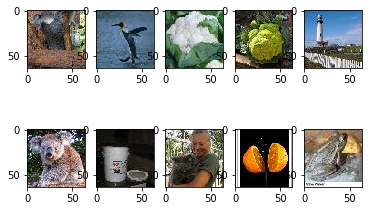

In [3]:
images, labels = dataset.get_next_batch()
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(images[i].transpose(1,2,0))
print(labels)

In [4]:
model = three_conv_network(20,64,64)
train = trainer(model, dataset, 0.001)
train.iterate()

(10, 8, 32, 32) (10, 16, 16, 16) (10, 32, 8, 8)


/home/lyzustc/programs/ml_project/train.py:22: RuntimeWarning: divide by zero encountered in log
  loss = np.sum(-one_hot_labels * np.log(out_tensor)-(1-one_hot_labels) * np.log(1 - out_tensor)) / self.dataset.batch_size
/home/lyzustc/programs/ml_project/train.py:22: RuntimeWarning: invalid value encountered in multiply
  loss = np.sum(-one_hot_labels * np.log(out_tensor)-(1-one_hot_labels) * np.log(1 - out_tensor)) / self.dataset.batch_size
/home/lyzustc/programs/ml_project/train.py:22: RuntimeWarning: invalid value encountered in log
  loss = np.sum(-one_hot_labels * np.log(out_tensor)-(1-one_hot_labels) * np.log(1 - out_tensor)) / self.dataset.batch_size
/home/lyzustc/programs/ml_project/train.py:23: RuntimeWarning: divide by zero encountered in true_divide
  out_diff_tensor = (out_tensor - one_hot_labels) / out_tensor / (1 - out_tensor) / self.dataset.batch_size
/home/lyzustc/programs/ml_project/train.py:23: RuntimeWarning: invalid value encountered in true_divide
  out_diff_tensor

IndexError: shape mismatch: indexing arrays could not be broadcast together with shapes (200,) (20480,) 

In [4]:
model2 = single_conv_network(20,64,64)
trainer2 = trainer(model2, dataset1, 0.001)
loss = []
accurate = []
temp = 0
#trainer2.iterate()
for i in range(50000):
    display.clear_output(wait = True)
    temp += trainer2.iterate()
    if i % 10 == 0 and i != 0:
        loss.append(temp / 10)
        temp = 0
        if i % 100 == 0:
            accurate.append(test(trainer2.net, "test.txt", 64, 64))
    plt.figure(figsize=(10,5))       
    plt.subplot(1,2,1)
    plt.plot(loss)
    plt.subplot(1,2,2)
    plt.plot(accurate)
    plt.show()

KeyboardInterrupt: 

In [274]:
test(trainer2.net, "test.txt", 64, 64)

0.308

In [10]:
a = np.random.randn(1000,1)
print(np.dot(a.T,a)/1000)

[[ 0.98800262]]


In [23]:
a = np.array([[1,2,3],[3,0,5],[1,2,4],[3,5,1]])
c = np.zeros(a.shape)
b = a.argmax(axis=1)
a[range(4),b] = 0
a

array([[1, 2, 0],
       [3, 0, 0],
       [1, 2, 0],
       [3, 0, 1]])